In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.datasets import load_digits

In [51]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [52]:
# gray scales images of hand written digits, 8 x 8 pixels
digits.images.shape

(1797, 8, 8)

In [53]:
"""
look at first image w/indexing along 1st axis
8 * 8 values between 0 and 16
"""
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

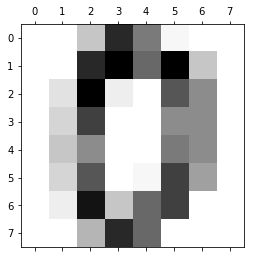

In [54]:
"""
low resolution version of handwritten 0.
classificaiton dataset w/10 classes. Digits of 0 to 9.
"""

plt.matshow(digits.images[0], cmap=plt.cm.Greys)

In [77]:
#each image is a single row of 64 pixels in 2D array.
digits.data.shape

(1797, 64)

In [79]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [56]:
#1D numpy array
#1 entry for each image in dataset
digits.target.shape

(1797,)

In [57]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [58]:
X = digits.data
y = digits.target

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
#import model class
from sklearn.svm import LinearSVC
#instantiate an object and set parameters
svm = LinearSVC(C=0.1)
#fit the model
svm.fit(X_train,y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [61]:
#apply and evaluate
print(svm.predict(X_train))
print(y_train)

[8 7 1 ... 2 7 1]
[8 7 1 ... 2 7 1]


In [62]:
svm.score(X_train,y_train)

0.9968178202068417

In [63]:
svm.score(X_test,y_test)

0.9518518518518518

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
#set number of trees in forest to 50
rf = RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [66]:
pred = rf.predict(X_test)

In [67]:
pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 7, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 1, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 0, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [68]:
#to evaluate model
rf.score(X_test, y_test)

0.9685185185185186

In [69]:
from sklearn.metrics import confusion_matrix

Text(91.68,0.5,'true value')

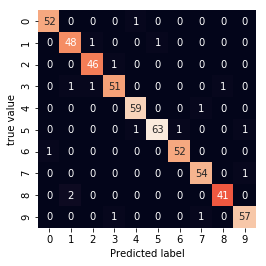

In [74]:
"""
shows us where the mislabeled tend to be. 
2 was mischaracterized as a 1, 1 time
3 was mischaracterized as a 1, 1 time
"""

mat = confusion_matrix(y_test,pred)
sns.heatmap(mat, square=True, annot=True, cbar=False);
plt.xlabel('Predicted label')
plt.ylabel('true value')